## Porto Seguro’s Safe Driver Prediction

Plataforma Kaggle<br>
Link: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/

### Análise do Problema

"Nesta competição, você é desafiado a criar um modelo que preveja a probabilidade de um motorista iniciar uma reivindicação de seguro automóvel no próximo ano. Embora a Porto Seguro use o aprendizado de máquina nos últimos 20 anos, eles procuram a comunidade de aprendizado de máquina do Kaggle para explorar métodos novos e mais poderosos. Uma previsão mais precisa permitirá que eles ajustem ainda mais seus preços e, com sorte, torne a cobertura do seguro de automóvel mais acessível a mais motoristas."

### Score Metric

As submissões são avaliadas usando o coeficiente de Gini normalizado.<br>

Durante a pontuação, as observações são classificadas da maior para a menor previsão. As previsões são usadas apenas para ordenar observações; portanto, a magnitude relativa das previsões não é usada durante a pontuação. O algoritmo de pontuação compara a proporção cumulativa de observações positivas da classe com uma proporção uniforme teórica.<br>

O coeficiente de Gini varia de aproximadamente 0 para adivinhação aleatória, e aproximadamente 0,5 para uma pontuação perfeita. O máximo teórico para o cálculo discreto é (1 - frac_pos) / 2.<br>

O coeficiente de Gini normalizado ajusta a pontuação pelo máximo teórico para que a pontuação máxima seja 1.

In [91]:
## importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [92]:
## importar dados
train = pd.read_csv('dados/train.csv')
test = pd.read_csv('dados/test.csv')

In [93]:
## análise inicial dos valores da base de treino
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
##analisar características da base de treino e valores nulos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [95]:
##analisar características da base de teste e valores nulos
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

In [96]:
## Analisar itens de maiores correlações com a variável target
correlacoes = train.corr()
# features = correlacoes[(correlacoes['target'] <= -0.05) | (correlacoes['target'] >= 0.05) & (correlacoes['target'] < 1.0)]['target']
corrTarget = correlacoes['target']
corrTarget.sort_values()

ps_car_07_cat    -0.036395
ps_ind_06_bin    -0.034017
ps_car_02_cat    -0.031534
ps_ind_16_bin    -0.027778
ps_ind_15        -0.021506
ps_car_08_cat    -0.020342
ps_ind_09_bin    -0.008237
ps_car_14        -0.004474
ps_calc_19_bin   -0.001744
ps_car_11        -0.001213
ps_calc_12       -0.001133
ps_calc_20_bin   -0.001072
ps_calc_08       -0.001006
ps_calc_15_bin   -0.000490
ps_calc_13       -0.000446
id               -0.000188
ps_calc_17_bin   -0.000170
ps_calc_07       -0.000103
ps_calc_04        0.000033
ps_calc_06        0.000082
ps_calc_11        0.000371
ps_calc_18_bin    0.000552
ps_calc_16_bin    0.000624
ps_calc_09        0.000719
ps_calc_05        0.000771
ps_car_10_cat     0.001038
ps_calc_10        0.001061
ps_calc_02        0.001360
ps_calc_14        0.001362
ps_calc_01        0.001782
ps_ind_10_bin     0.001815
ps_calc_03        0.001907
ps_ind_11_bin     0.002028
ps_ind_13_bin     0.002460
ps_ind_02_cat     0.004534
ps_ind_18_bin     0.004555
ps_car_09_cat     0.005322
p

In [97]:
## Baseado na correlação, irei retirar variáveis com correlação 0,00
features_test = correlacoes[(correlacoes['target'] <= -0.01) | (correlacoes['target'] >= 0.01) & (correlacoes['target'] < 1.0)]['target']
features_train = correlacoes[(correlacoes['target'] <= -0.01) | (correlacoes['target'] >= 0.01)]['target']
features_train


target           1.000000
ps_ind_01        0.018570
ps_ind_05_cat    0.029165
ps_ind_06_bin   -0.034017
ps_ind_07_bin    0.034218
ps_ind_08_bin    0.013147
ps_ind_15       -0.021506
ps_ind_16_bin   -0.027778
ps_ind_17_bin    0.037053
ps_reg_01        0.022888
ps_reg_02        0.034800
ps_reg_03        0.030888
ps_car_01_cat    0.016256
ps_car_02_cat   -0.031534
ps_car_03_cat    0.032401
ps_car_04_cat    0.032900
ps_car_05_cat    0.020754
ps_car_06_cat    0.011537
ps_car_07_cat   -0.036395
ps_car_08_cat   -0.020342
ps_car_12        0.038790
ps_car_13        0.053899
ps_car_15        0.027667
Name: target, dtype: float64

In [98]:
## Ajustando bases de treino e teste com as variáveis escolhidas
dfTrain = train[['target',
'ps_ind_01',
'ps_ind_05_cat',
'ps_ind_06_bin',
'ps_ind_07_bin',
'ps_ind_08_bin',
'ps_ind_15',
'ps_ind_16_bin',
'ps_ind_17_bin',
'ps_reg_01',
'ps_reg_02',
'ps_reg_03',
'ps_car_01_cat',
'ps_car_02_cat',
'ps_car_03_cat',
'ps_car_04_cat',
'ps_car_05_cat',
'ps_car_06_cat',
'ps_car_07_cat',
'ps_car_08_cat',
'ps_car_12',
'ps_car_13',
'ps_car_15']
]

dfTest = test[[
'ps_ind_01',
'ps_ind_05_cat',
'ps_ind_06_bin',
'ps_ind_07_bin',
'ps_ind_08_bin',
'ps_ind_15',
'ps_ind_16_bin',
'ps_ind_17_bin',
'ps_reg_01',
'ps_reg_02',
'ps_reg_03',
'ps_car_01_cat',
'ps_car_02_cat',
'ps_car_03_cat',
'ps_car_04_cat',
'ps_car_05_cat',
'ps_car_06_cat',
'ps_car_07_cat',
'ps_car_08_cat',
'ps_car_12',
'ps_car_13',
'ps_car_15']
]

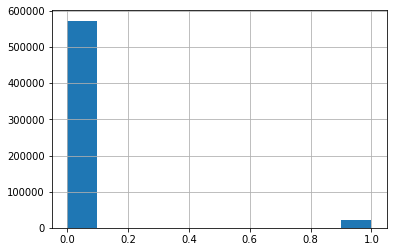

In [99]:
## Analisando a variável target
dfTrain['target'].hist()

Trata-se de uma variável desbalanceada, já que o objetivo é um melhor índice dos casos positivos (1), será necessário realzar um balanceamento na base, deixando a mesma quantidade de casos 0 e 1

In [133]:
## Balanceando a base
baseZero = dfTrain[dfTrain['target'] == 0]
baseUm = dfTrain[dfTrain['target'] == 1]

## Balancear quantidade da baseZero, estratificando pela variável de maior correlação com o target (ps_car_13)
baseZero = baseZero.sample(n=baseUm.shape[0], weights='ps_car_13', random_state=1).reset_index(drop=True)
dfTrainBalanceada = pd.concat([baseUm,baseZero])

In [100]:
## Modelo 1 - GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [134]:
# Gerando o conjunto de dados
X = dfTrainBalanceada.drop('target', axis = 1)
y = dfTrainBalanceada['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [135]:
# Criando o Modelo
est = GradientBoostingClassifier(n_estimators = 200, max_depth = 3)
est.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [136]:
# Previsões das classes (labels)
pred = est.predict(X)
# Score nos dados de teste (Acurácia)
acc = est.score(X, y)
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
auc = metrics.auc(fpr, tpr)
gini = 1 - auc
gini

0.3999031990412095

In [137]:
## Acurácia alta, índice de GINI nos testes de 0,39 no treino
## Executar esse modelo para imputar resultado
model1 = est.predict(dfTest)
model1.shape
model1.shape


(892816,)

## Submission File


Para cada ID no conjunto de testes, você deve prever a probabilidade de uma reivindicação de seguro na coluna de destino.

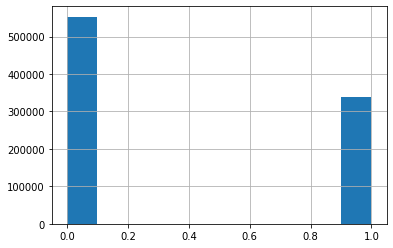

In [140]:
## Gerar arquivo com saída

submission = pd.DataFrame({
    "id": test.id, 
    "target": model1
})

submission.target.hist()

In [141]:
submission.to_csv('submission.csv', index = False, header=True)